# Cleaning: Population Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv
pop_df = pd.read_csv("New_York_City_Population_by_Borough__1950_-_2040.csv")
pop_df.columns = pop_df.columns.str.strip()  # delete any extra spaces in col name

# only total population
pop_2020_df = pop_df[pop_df["Age Group"] == "Total Population"][["Borough", "2020"]].copy()

# clean up names
pop_2020_df["Borough"] = pop_2020_df["Borough"].str.strip().str.title()

# drop total
pop_2020_df = pop_2020_df[pop_2020_df["Borough"] != "Nyc Total"]

# dict
borough_pop = pop_2020_df.set_index("Borough")["2020"].to_dict()


<Figure size 1200x1000 with 0 Axes>

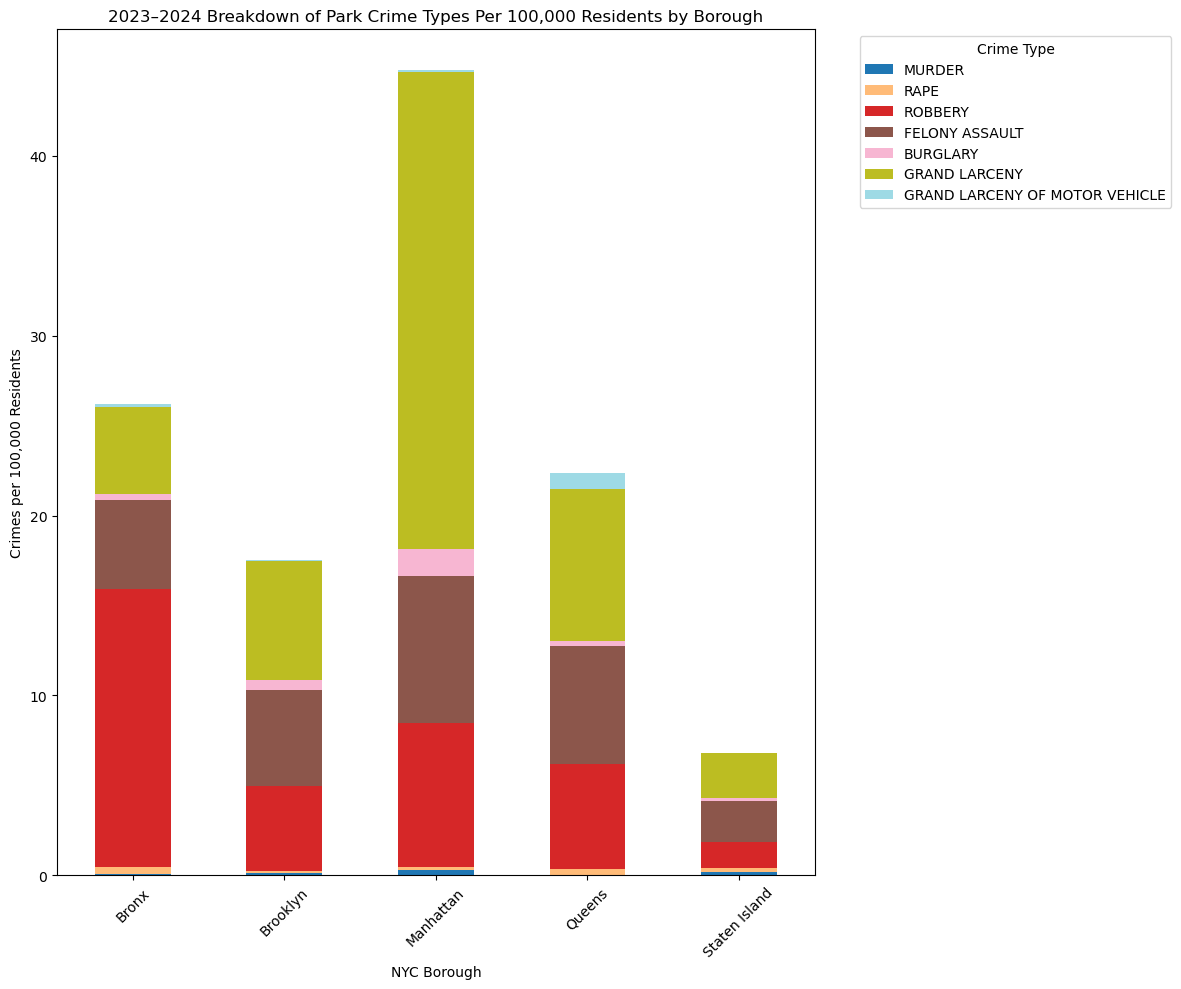

In [3]:
# Load the combined CSV file
df = pd.read_csv("combined_nyc_park_crime_stats.csv")

# Clean column names
df.columns = df.columns.str.strip().str.upper()

# Format borough names
df["BOROUGH"] = df["BOROUGH"].str.strip().str.title()

df = df[df["BOROUGH"] != "Brooklyn/Queens"]

# Crime types
crime_types = ['MURDER', 'RAPE', 'ROBBERY', 'FELONY ASSAULT', 'BURGLARY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE']

# Group and sum by borough
crime_by_type = df.groupby("BOROUGH")[crime_types].sum()

# Normalize per 100,000 residents
for col in crime_types:
    crime_by_type[col] = (crime_by_type[col] / crime_by_type.index.map(borough_pop)) * 100000

# Plot
plt.figure(figsize=(12, 10))
crime_by_type.plot(kind="bar", stacked=True, figsize=(12, 10), colormap="tab20")
plt.title("2023–2024 Breakdown of Park Crime Types Per 100,000 Residents by Borough")
plt.xlabel("NYC Borough")
plt.ylabel("Crimes per 100,000 Residents")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("pc_crime_types_stacked.png")
plt.show()
